Arnaud Strapart - 38321800 

Tâche 9

In [9]:
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import *
import numpy as np

In [10]:
USER_API_KEY = "Nodct0JRu4WQk1EPp"
with MPRester(USER_API_KEY) as m:
    # Structure for material id
    structure = m.get_structure_by_material_id("mp-961673")
    bandstructure_phonons = m.get_phonon_bandstructure_by_material_id("mp-961673")
    print(structure)

Full Formula (Ti1 Fe1 Te1)
Reduced Formula: TiFeTe
abc   :   4.160199   4.160199   4.160199
angles:  60.000000  60.000000  60.000000
Sites (3)
  #  SP       a     b     c    magmom
---  ----  ----  ----  ----  --------
  0  Ti    0.5   0.5   0.5     -0.006
  1  Fe    0.25  0.25  0.25     0.008
  2  Te    0     0     0        0


### Représentation graphique des courbes de dispertions du TiFeTe + Zone de Brillouin

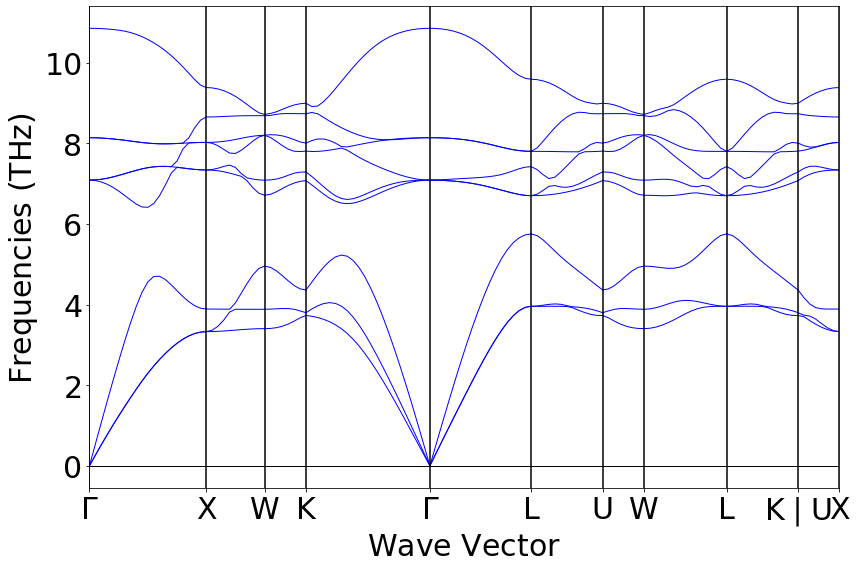

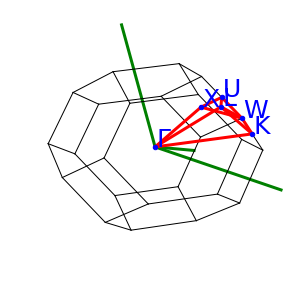

In [3]:
phonon_plot = PhononBSPlotter(bandstructure_phonons)
phonon_plot.show()
phonon_plot.plot_brillouin()

###  Calculer la vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin.

On va tout d'abord choisir 3 directions différentes de la zone de Brillouin. \
Ces directions peuvent être choisies de manière arbitraire. On prend alors : \
Direction 1 : X - W \
Direction 2 : W - K \
Direction 3 : K - Γ


On peut maintenant calculer les vitesses du son en prenant la dérivée de la relation de dispersion par rapport au vecteur d'onde q. \
On tombe alors sur la relation v = 2*pi*|df/dq|. Il est donc nécessaire de calculer le terme df/dq, qui vaut la pente du graphe.  \
Il est important de considérer que nous sommes dans le cas de grandes longueurs d'ondes, c'est à dire λ >> a où a est le paramètre de maille.

In [4]:
data = phonon_plot.bs_plot_data()
dist = data.get("distances")
freq = data.get("frequency")

In [5]:
def dfdq_neg(frequence,q):
    return ((frequence[-1] - frequence[-2])*10**12)/((q[-1]-q[-2])*(10**10))

def dfdq_pos(frequence,q):
    return ((frequence[1]-frequence[0])*10**12)/((q[1]-q[0])*(10**10))

In [6]:
vitesse_son_XW = 2*np.pi*np.abs(dfdq_pos(freq[1][0],dist[3]))
vitesse_son_WK = 2*np.pi*np.abs(dfdq_pos(freq[2][0],dist[4]))
vitesse_son_KΓ = 2*np.pi*np.abs(dfdq_neg(freq[3][0],dist[5]))

In [7]:
print("La vitesse du son dans la direction X-W vaut "+str(vitesse_son_XW)+" m/s.")
print("La vitesse du son dans la direction W-K vaut "+str(vitesse_son_WK)+" m/s.")
print("La vitesse du son dans la direction K-Γ vaut "+str(vitesse_son_KΓ)+" m/s.")

La vitesse du son dans la direction X-W vaut 22.562428494408117 m/s.
La vitesse du son dans la direction W-K vaut 55.74198260230981 m/s.
La vitesse du son dans la direction K-Γ vaut 3085.26286813891 m/s.


Les différences significatives des vitesses du son en fonction de la direction de propagation permettent de mettre en évidence le caractère anisotrope de notre matériau.